## 🌦️ Weather Forecasting & Analysis Script Overview

This Python script performs the following tasks:

- 📥 Downloads weather data from [climate.weather.gc.ca](https://climate.weather.gc.ca) for Ottawa station **4333**.
- 📊 Plots historical temperature data including:
  - Aggregate **monthly** mean temperatures.
  - Aggregate **yearly** mean temperatures.
- 🔮 Predicts daily mean temperatures using **PyTorch** and an **LSTM (Long Short-Term Memory)** model.
- 📈 Calculates and plots **1-year** and **10-year rolling means** to observe long-term trends.
- 🔥 Generates a **correlation heatmap** to visualize relationships between monthly **minimum temperatures**.


Modify **station_id** and (optional) **year_range** for other locations.

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
import os

import logging
logging.basicConfig(level=logging.INFO)


# Target download parameters
year_range=range(1889,2025+1)
station_id = 4333
year = 2019
month = 6
format = "csv"  

for year in year_range:
    # Construct the download URL
    try:
        base_url="https://climate.weather.gc.ca/climate_data/bulk_data_e.html"
        params = {
            "format": format,
            "stationID": station_id,
            "Year": year,
            "Month": month,
            "Day": 1,
            "timeframe": 2,
        }
        # Send the request
        response = requests.get(base_url, params=params)
    except requests.exceptions.RequestException as e:
        logging.error(f"Failed for year {year}: {year}")
        continue  
    # Save the CSV file
    output_dir = "weather_data"
    os.makedirs(output_dir, exist_ok=True)
    filename = f"{output_dir}/weather_{station_id}_{year}.csv"
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"✅ CSV downloaded to: {filename}")

✅ CSV downloaded to: weather_data/weather_4333_1889.csv
✅ CSV downloaded to: weather_data/weather_4333_1890.csv
✅ CSV downloaded to: weather_data/weather_4333_1891.csv
✅ CSV downloaded to: weather_data/weather_4333_1892.csv
✅ CSV downloaded to: weather_data/weather_4333_1893.csv
✅ CSV downloaded to: weather_data/weather_4333_1894.csv
✅ CSV downloaded to: weather_data/weather_4333_1895.csv
✅ CSV downloaded to: weather_data/weather_4333_1896.csv
✅ CSV downloaded to: weather_data/weather_4333_1897.csv
✅ CSV downloaded to: weather_data/weather_4333_1898.csv
✅ CSV downloaded to: weather_data/weather_4333_1899.csv
✅ CSV downloaded to: weather_data/weather_4333_1900.csv
✅ CSV downloaded to: weather_data/weather_4333_1901.csv
✅ CSV downloaded to: weather_data/weather_4333_1902.csv
✅ CSV downloaded to: weather_data/weather_4333_1903.csv
✅ CSV downloaded to: weather_data/weather_4333_1904.csv
✅ CSV downloaded to: weather_data/weather_4333_1905.csv
✅ CSV downloaded to: weather_data/weather_4333_1

In [3]:
df = pd.DataFrame()

#station_id = 4333
for year in year_range:
    filename = f"{output_dir}/weather_{station_id}_{year}.csv"
    df_add = pd.read_csv(filename,sep=',')
    df=pd.concat([df, df_add], ignore_index=True)
    print(f"✅ CSV {filename} added to dataframe")

✅ CSV weather_data/weather_4333_1889.csv added to dataframe
✅ CSV weather_data/weather_4333_1890.csv added to dataframe
✅ CSV weather_data/weather_4333_1891.csv added to dataframe
✅ CSV weather_data/weather_4333_1892.csv added to dataframe
✅ CSV weather_data/weather_4333_1893.csv added to dataframe
✅ CSV weather_data/weather_4333_1894.csv added to dataframe
✅ CSV weather_data/weather_4333_1895.csv added to dataframe
✅ CSV weather_data/weather_4333_1896.csv added to dataframe
✅ CSV weather_data/weather_4333_1897.csv added to dataframe
✅ CSV weather_data/weather_4333_1898.csv added to dataframe
✅ CSV weather_data/weather_4333_1899.csv added to dataframe
✅ CSV weather_data/weather_4333_1900.csv added to dataframe
✅ CSV weather_data/weather_4333_1901.csv added to dataframe
✅ CSV weather_data/weather_4333_1902.csv added to dataframe
✅ CSV weather_data/weather_4333_1903.csv added to dataframe
✅ CSV weather_data/weather_4333_1904.csv added to dataframe
✅ CSV weather_data/weather_4333_1905.csv

In [125]:
df.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [126]:
df.loc[:,['Year', 'Month', 'Day','Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)','Total Rain (mm)','Total Snow (cm)','Total Precip (mm)']]

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
0,1889,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1889,1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,1889,1,3,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,1,4,NaN,NaN,NaN,NaN,NaN,NaN
4,1889,1,5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
50033,2025,12,27,NaN,NaN,NaN,NaN,NaN,NaN
50034,2025,12,28,NaN,NaN,NaN,NaN,NaN,NaN
50035,2025,12,29,NaN,NaN,NaN,NaN,NaN,NaN
50036,2025,12,30,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
col_names=['Year', 'Month', 'Day','Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)','Total Rain (mm)','Total Snow (cm)','Total Precip (mm)']

In [129]:
df_current = df.dropna(subset=col_names)[col_names].copy()

In [130]:
print(df_current.shape)      # (number_of_rows, number_of_columns)
print(len(df_current.index)) # should match number_of_rows
print(df_current.head())     # inspect actual rows

(49322, 9)
49322
     Year  Month  Day  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  \
304  1889     11    1            3.9           -1.7             1.1   
305  1889     11    2           12.2            0.6             6.4   
306  1889     11    3           14.4            4.4             9.4   
307  1889     11    4            8.3            1.7             5.0   
308  1889     11    5            2.8           -0.6             1.1   

     Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  
304              0.0              0.0                0.0  
305              0.0              0.0                0.0  
306              5.6              0.0                5.6  
307              0.0              0.0                0.0  
308              0.0              0.0                0.0  


In [131]:
df_current

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
304,1889,11,1,3.9,-1.7,1.1,0.0,0.0,0.0
305,1889,11,2,12.2,0.6,6.4,0.0,0.0,0.0
306,1889,11,3,14.4,4.4,9.4,5.6,0.0,5.6
307,1889,11,4,8.3,1.7,5.0,0.0,0.0,0.0
308,1889,11,5,2.8,-0.6,1.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
49807,2025,5,15,23.5,16.5,20.0,0.0,0.0,0.0
49808,2025,5,16,28.0,12.5,20.3,0.0,0.0,0.0
49809,2025,5,17,22.5,15.0,18.8,8.0,0.0,8.0
49810,2025,5,18,17.0,10.0,13.5,0.6,0.0,0.6


In [181]:
df_agg_month=df_current.groupby(["Year", "Month"], as_index=False).agg({
    'Max Temp (°C)': 'max',
    'Min Temp (°C)': 'min', 
    'Mean Temp (°C)': 'mean',
    'Total Rain (mm)': 'mean',
    'Total Snow (cm)': 'mean',
    'Total Precip (mm)': 'mean'
})
#saves df_agg_month to weather_data folder to be used later
df_agg_month.to_csv('weather_data\weather_agg_month.csv', index=False)
df_agg_month

,Year,Month,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
0,1889,11,14.4,-11.7,1.186667,1.650000,0.676667,2.326667
1,1889,12,5.6,-23.3,-5.629032,1.600000,0.606452,2.206452
2,1890,1,8.9,-28.9,-9.877419,1.432258,1.758065,3.190323
3,1890,2,7.2,-24.4,-8.803571,1.725000,1.782143,3.507143
4,1890,3,6.1,-23.3,-4.854839,0.609677,0.687097,1.293548
...,...,...,...,...,...,...,...,...
1620,2025,1,2.5,-21.0,-8.141935,0.167742,0.935484,0.845161
1621,2025,2,6.0,-23.0,-9.160000,0.040000,3.080000,2.304000
1622,2025,3,17.0,-23.5,-0.119355,0.864516,1.032258,1.774194
1623,2025,4,25.0,-9.0,6.113333,2.433333,0.433333,2.766667


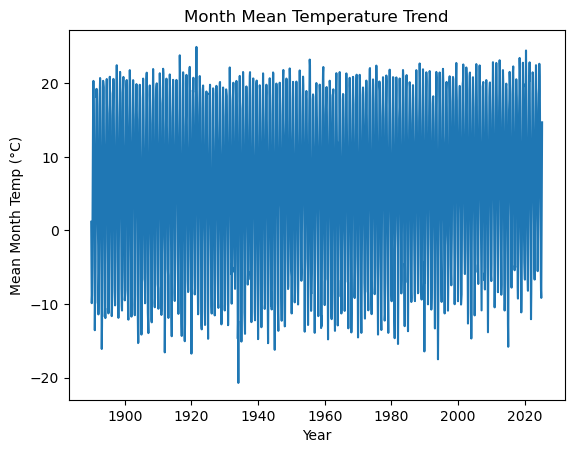

In [133]:
# Plot all available daily mean temp values
ax = sns.lineplot(data=df_agg_month, x=df_agg_month.index, y='Mean Temp (°C)')

unique_years = df_agg_month['Year'].drop_duplicates()
years_to_show = unique_years[unique_years % 20 == 0].drop_duplicates()
tick_positions = years_to_show.index

# Set x-ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(years_to_show.tolist(), rotation=0)

# Decorate the plot
plt.title('Month Mean Temperature')
plt.xlabel('Year')
plt.ylabel('Mean Month Temp (°C)')
#splt.grid(True)
#plt.tight_layout()
plt.show()


In [135]:
df_year=df_current.groupby("Year").agg({
    'Max Temp (°C)': 'max',
    'Min Temp (°C)': 'min', 
    'Mean Temp (°C)': 'mean',
    'Total Rain (mm)': 'mean',
    'Total Snow (cm)': 'mean',
    'Total Precip (mm)': 'mean'
}).iloc[1:-1]
df_year

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
Year,,,,,,
1890,33.9,-28.9,4.707143,1.762912,0.510714,2.273352
1891,33.9,-32.8,6.194521,2.115342,0.521370,2.636986
1892,36.1,-31.1,5.110109,1.603279,0.756011,2.359290
1893,35.0,-32.2,4.354521,2.304658,0.788767,3.093151
1894,33.9,-32.2,6.108493,1.653151,0.486575,2.139726
...,...,...,...,...,...,...
2020,37.0,-26.5,8.595286,2.176431,0.540741,2.641751
2021,33.5,-23.0,8.392055,2.030959,0.471233,2.458356
2022,33.0,-26.5,8.816082,2.567251,0.447368,2.963743


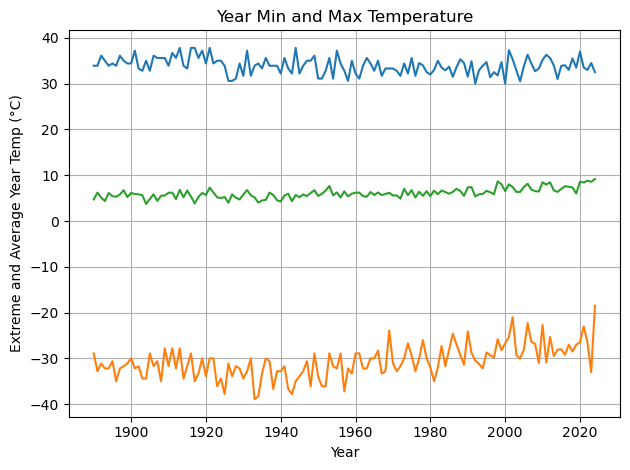

In [136]:
sns.lineplot(data=df_year, x=df_year.index, y='Max Temp (°C)')
sns.lineplot(data=df_year, x=df_year.index, y='Min Temp (°C)')
sns.lineplot(data=df_year, x=df_year.index, y='Mean Temp (°C)')
plt.title('Year Min and Max Temperature')
plt.ylabel('Extreme and Average Year Temp (°C)')
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

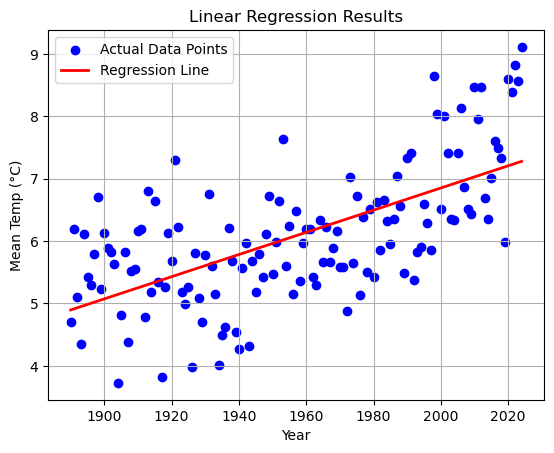

In [37]:
from sklearn.linear_model import LinearRegression

x = df_year.index.to_numpy().reshape(-1, 1)
y = df_year['Mean Temp (°C)']  
model = LinearRegression()
model.fit(x, y)

plt.scatter(x, y, color='blue', label='Actual Data Points')
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Mean Temp (°C)')
plt.title('Linear Regression Results')

plt.legend()
plt.grid(True)
plt.show()

# Make predictions and plot - works better for multidimension free variable
# y_pred = model.predict(x)
# sns.scatterplot(x=df_year['Mean Temp (°C)'], y=y_pred, color='blue', label='Predicted vs Actual Mean Temp')
# sns.lineplot(x=df_year['Mean Temp (°C)'], y=df_year['Mean Temp (°C)'], color='red', label='Perfect Prediction')

# plt.xlabel('Actual Target')
# plt.ylabel('Predicted Target')
# plt.title('Actual vs Predicted Values')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# View coefficients
# print("Slope:", model.coef_)
# print("Intercept:", model.intercept_)

In [139]:
# Forecast of dayly mean temperature using using PyTorch and LSTM (Long Short-Term Memory)

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim

In [140]:
# LINEAR REGRESSION


# x = torch.tensor(df_current[['Year', 'Month', 'Day']].to_numpy(), dtype=torch.float32)
# y = torch.tensor(df_current[['Mean Temp (°C)']].to_numpy(), dtype=torch.float32)
# model = nn.Linear(in_features=3, out_features=1)

# criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01)

# for i in range(60):
#     y_pred = model(x)
#     loss = criterion(y_pred, y)
#     optimizer.zero_grad()
#     loss.backward()
#     torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
#     optimizer.step()

# # Print learned parameters
# print("Learned weights:", model.weight.data)
# print("Learned bias:", model.bias.data)

# After training loop
# y_pred = model(x).detach().numpy()
# y_actual = y.numpy()

# # Plot actual vs predicted
# plt.figure(figsize=(8, 5))
# plt.scatter(y_actual, y_pred, color='blue', label='Predicted vs Actual')
# plt.plot(y_actual, y_actual, color='red', label='Perfect Prediction Line')

# plt.xlabel('Actual Mean Temp (°C)')
# plt.ylabel('Predicted Mean Temp (°C)')
# plt.title('Actual vs Predicted Temperatures')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [108]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Combine date features into a single time index (optional)
df_current['Date'] = pd.to_datetime(df_current[1:3000][['Year', 'Month', 'Day']])
df_current.sort_values('Date', inplace=True)

# Select target column
target = df_current[1:3000]['Mean Temp (°C)'].values.reshape(-1, 1)

# Normalize target values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler.fit_transform(target)

In [109]:
sequence_length = 30
X, y = [], []

for i in range(len(scaled_target) - sequence_length):
    X.append(scaled_target[i:i + sequence_length])
    y.append(scaled_target[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)


In [110]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.linear(out[:, -1, :])


In [112]:
from torch.utils.data import DataLoader, TensorDataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(input_size=1, hidden_size=128, num_layers=2, output_size=1).to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32)

for epoch in range(50):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        loss = loss_fn(model(batch_X), batch_y)
        loss.backward()
        optimizer.step()


In [116]:
split = int(len(X_tensor) * 0.8)
X_train, X_test = X_tensor[:split], X_tensor[split:]
y_train, y_test = y_tensor[:split], y_tensor[split:]

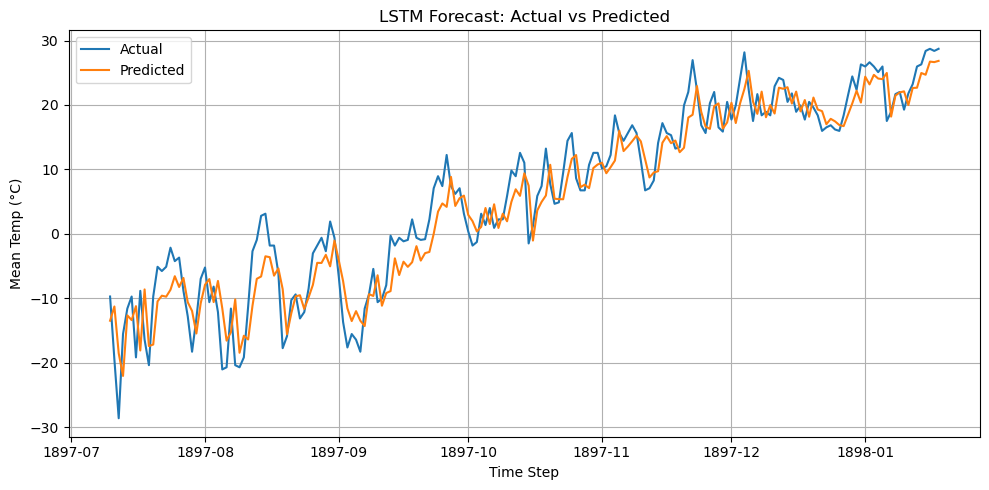

In [123]:

# Switch to evaluation mode
model.eval()

# Collect predictions
predictions = []
actuals = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        output = model(batch_X)
        predictions.extend(output.cpu().numpy())
        actuals.extend(batch_y.cpu().numpy())

# Convert to NumPy arrays
predictions = np.array(predictions)
actuals = np.array(actuals)

# Inverse transform to original scale (if you used MinMaxScaler)
predictions = scaler.inverse_transform(predictions)
actuals = scaler.inverse_transform(actuals)

# Plot
plt.figure(figsize=(10, 5))
# plt.plot(actuals, label="Actual", color='blue')
# plt.plot(predictions, label="Predicted", color='orange')
date_axis = df_current['Date'].values[3000-len(actuals):3000]
plt.plot(date_axis, actuals, label="Actual")
plt.plot(date_axis, predictions, label="Predicted")
plt.title("LSTM Forecast: Actual vs Predicted")
plt.xlabel("Time Step")
plt.ylabel("Mean Temp (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Rolling minimum and mean temperatures

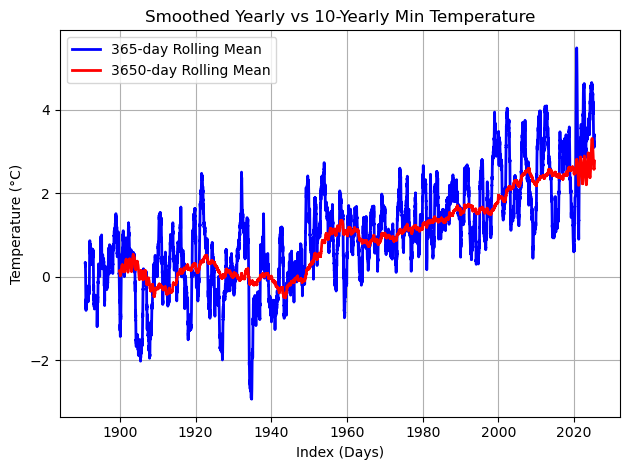

In [167]:
# Plot raw daily minimum temperature

# Plot 30-day rolling average
df_current.loc[:, 'Min Temp (°C)'].rolling(window=365).mean().plot(
    lw=2, color='blue', label='365-day Rolling Mean'
)

# Plot 365-day rolling average
ax=df_current.loc[:, 'Min Temp (°C)'].rolling(window=3650).mean().plot(
    lw=2, color='red', label='3650-day Rolling Mean'
)
unique_years = df_current['Year'].drop_duplicates()
years_to_show = unique_years[unique_years % 20 == 0].drop_duplicates()
tick_positions = years_to_show.index

# Set x-ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(years_to_show.tolist(), rotation=0)

# Beautify the plot
plt.title("Smoothed Yearly vs 10-Yearly Min Temperature")
plt.ylabel("Temperature (°C)")
plt.xlabel("Index (Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

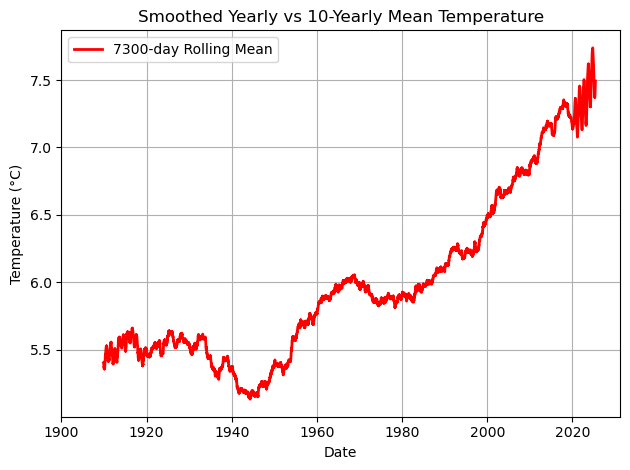

In [66]:
# Plot raw daily minimum temperature
#df_current.loc[:365*8, 'Min Temp (°C)'].plot(label='Daily Min Temp', alpha=0.6)

# Plot 30-day rolling average
ax=df_current.loc[:, 'Mean Temp (°C)'].rolling(window=7300).mean().plot(
    lw=2, color='red', label='7300-day Rolling Mean'
)
unique_years = df_current['Year'].drop_duplicates()
years_to_show = unique_years[unique_years % 20 == 0].drop_duplicates()
tick_positions = years_to_show.index

# Set x-ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(years_to_show.tolist(), rotation=0)


# Beautify the plot
plt.title("Smoothed 10-Yearly Mean Temperature")
plt.ylabel("Temperature (°C)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Correlation between winter/ summer temperatures

In [141]:
df_agg_month

,Year,Month,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
0,1889,11,14.4,-11.7,1.186667,1.650000,0.676667,2.326667
1,1889,12,5.6,-23.3,-5.629032,1.600000,0.606452,2.206452
2,1890,1,8.9,-28.9,-9.877419,1.432258,1.758065,3.190323
3,1890,2,7.2,-24.4,-8.803571,1.725000,1.782143,3.507143
4,1890,3,6.1,-23.3,-4.854839,0.609677,0.687097,1.293548
...,...,...,...,...,...,...,...,...
1620,2025,1,2.5,-21.0,-8.141935,0.167742,0.935484,0.845161
1621,2025,2,6.0,-23.0,-9.160000,0.040000,3.080000,2.304000
1622,2025,3,17.0,-23.5,-0.119355,0.864516,1.032258,1.774194
1623,2025,4,25.0,-9.0,6.113333,2.433333,0.433333,2.766667


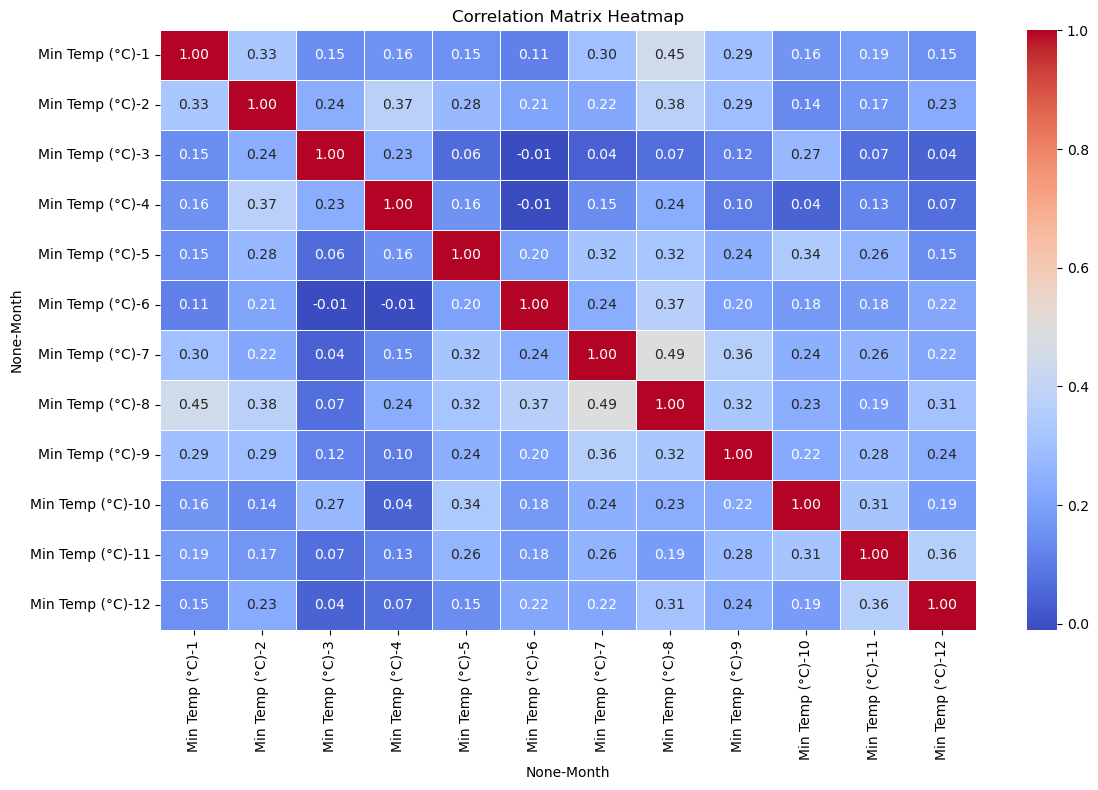

In [166]:
df_multi = df_agg_month.set_index(['Year', 'Month']).unstack().dropna()
corr_matrix = df_multi[['Min Temp (°C)']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [177]:
# from statsmodels.tsa.stattools import ccf
# temp = df_agg_month['Min Temp (°C)'].to_numpy()
# percip = df_agg_month['Total Precip (mm)'].to_numpy()
# cross_correlation = ccf(temp,percip , adjusted=True, fft=True, nlags=None, alpha=None)